In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [106]:
X = df.drop('sales',axis=1)
y = df['sales']

In [107]:
from sklearn.preprocessing import PolynomialFeatures

In [108]:
poly_converter = PolynomialFeatures(degree=2,include_bias=False)

In [109]:
poly_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [110]:
poly_converter.transform(X)

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [111]:
poly_feat = poly_converter.fit_transform(X)
poly_feat

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [112]:
poly_feat.shape

(200, 9)

In [113]:
X.shape

(200, 3)

In [114]:
X.iloc[0]

TV           230.1
radio         37.8
newspaper     69.2
Name: 0, dtype: float64

In [115]:
poly_feat[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [116]:
230.1*37.8

8697.779999999999

In [117]:
230.1*69.2

15922.92

In [118]:
37.8*69.2

2615.7599999999998

In [119]:
230.1**2

52946.009999999995

In [120]:
37.8**2

1428.8399999999997

In [121]:
69.2**2

4788.64

## Train Test Split

In [122]:
from sklearn.model_selection import train_test_split

In [123]:
#help(train_test_split)

In [124]:
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=101)

In [125]:
X_train.shape

(140, 9)

In [126]:
y_train.shape

(140,)

In [127]:
from sklearn.linear_model import LinearRegression

In [128]:
model = LinearRegression(fit_intercept=True)

In [129]:
model.fit(X_train,y_train)

LinearRegression()

In [130]:
y_pred = model.predict(X_test)

In [131]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [132]:
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

In [133]:
MAE

0.4896798044803488

In [134]:
MSE

0.4417505510403312

In [135]:
RMSE

0.6646431757268942

In [136]:
df['sales'].mean()

14.0225

RMSE: 0.6646431757268942

In [137]:
poly_feat[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [138]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

### Choose a Model

In [139]:
#TRAINING ERROR PER DEGREE
train_rmse_list = []
#TEST ERROR PER DEGREE
test_rmse_list = []

for d in range(1,10):
    
    #CREATE POLY DATA FOR DEGREE 'd'
    poly_converter = PolynomialFeatures(degree = d, include_bias=False)
    poly_features = poly_converter.fit_transform(X)
    
    #SPLIT THIS INTO TRAINING AND TESTING SET
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features,y,test_size=0.3,random_state=101)
    
    #TRAIN MODEL ON POLY SET
    
    model_one = LinearRegression(fit_intercept=True)
    model_one.fit(X_train,y_train)
    
    #PREDICT ON TRAIN AND TEST 
    training_pred = model_one.predict(X_train)
    testing_pred = model_one.predict(X_test)
    
    #Calculate Errors
    training_rmse = np.sqrt(mean_squared_error(y_train,training_pred))
    testing_rmse = np.sqrt(mean_squared_error(y_test,testing_pred))
    
    #PUT THESE ERRORS IN THE TWO LISTS
    
    train_rmse_list.append(training_rmse)
    test_rmse_list.append(testing_rmse)

In [140]:
train_rmse_list

[1.7345941243293759,
 0.5879574085292232,
 0.4339344356902067,
 0.3517083688399347,
 0.25093429451233085,
 0.1934278097421558,
 5.422368782402398,
 0.14505198696186963,
 0.16704892185716372]

In [141]:
test_rmse_list

[1.5161519375993882,
 0.6646431757268942,
 0.5803286825226185,
 0.5077742648398241,
 2.5758238588318223,
 4.382573556772669,
 1377.9931160321764,
 4894.148331028541,
 93341.68460818131]

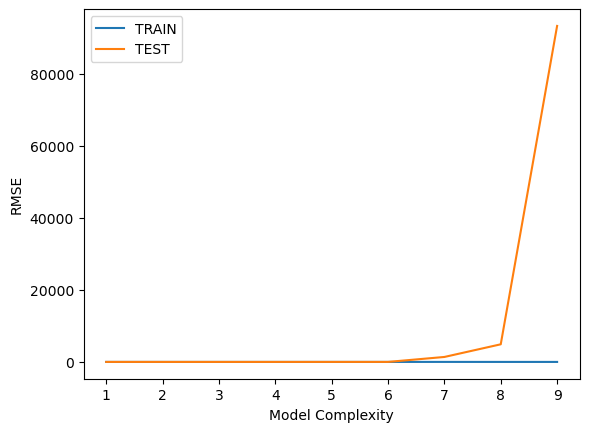

In [142]:
plt.plot(range(1,10),train_rmse_list,label='TRAIN')
plt.plot(range(1,10),test_rmse_list,label='TEST')
plt.xlabel('Model Complexity')
plt.ylabel('RMSE')
plt.legend()
plt.show()

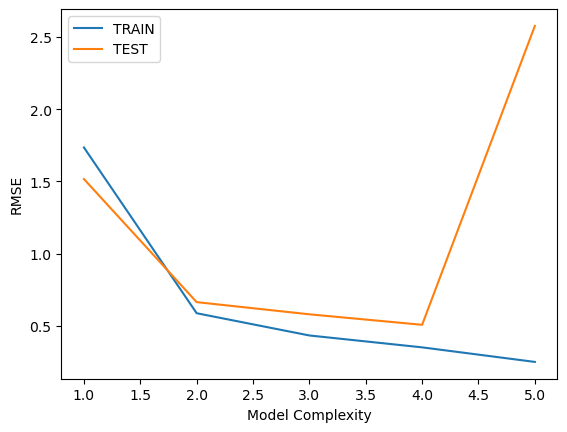

In [143]:
plt.plot(range(1,6),train_rmse_list[:5],label='TRAIN')
plt.plot(range(1,6),test_rmse_list[:5],label='TEST')
plt.xlabel('Model Complexity')
plt.ylabel('RMSE')
plt.legend()
plt.show()

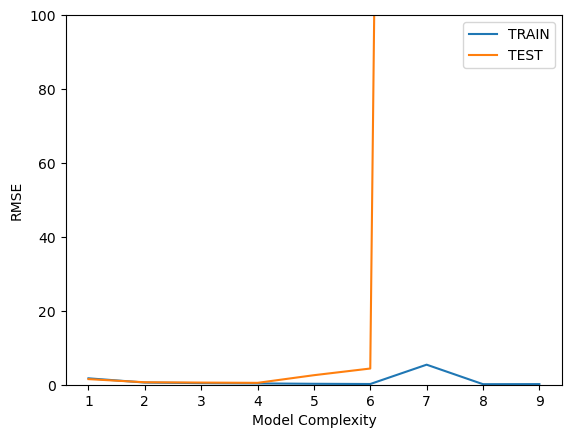

In [144]:
plt.plot(range(1,10),train_rmse_list,label='TRAIN')
plt.plot(range(1,10),test_rmse_list,label='TEST')
plt.xlabel('Model Complexity')
plt.ylabel('RMSE')
plt.ylim(0,100)
plt.legend()
plt.show()

## Choosing 4 as my degree of equation and retraining my model to entire dataset

In [145]:
final_poly_conv = PolynomialFeatures(degree=4,include_bias=False)
final_model = LinearRegression()
final_model.fit(final_poly_conv.fit_transform(X),y)

LinearRegression()

### Saving Model and Converter

In [146]:
from joblib import dump, load

dump(final_model,'poly_model.joblib')
dump(final_poly_conv,'poly_conv_degree4.joblib')

['poly_conv_degree4.joblib']

In [150]:
year_ads = [[149,22,12],[320,123,90],[123,43,23],[121,98,342]]

In [151]:
loaded_poly = load('poly_conv_degree4.joblib')
loaded_model = load('poly_model.joblib')

In [152]:
year_ads_poly = loaded_poly.transform(year_ads)
loaded_model.predict(year_ads_poly)

/Users/shrey/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([ 14.3579557 , 175.5713546 ,  17.2079889 , 199.77031705])